<a href="https://colab.research.google.com/github/ravirajtalpate/car-price-prediction/blob/main/unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -------------------------------
# Import libraries
# -------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv("Mall_Customers.csv")

# Select features for clustering
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X_scaled = StandardScaler().fit_transform(x)

# -------------------------------
# 1. KMeans with Silhouette Score
# -------------------------------
K = range(2, 11)
scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(x)
    score = silhouette_score(x, labels)
    scores.append(score)
    print(f"k={k}, silhouette_score={score:.3f}")

# Plot silhouette score for K-means
plt.figure(figsize=(8,5))
plt.plot(K, scores, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.show()
# plot silhouette score for DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_scaled is your preprocessed data
# Define a range of eps values to test
eps_values = np.arange(0.1, 0.5, 1, 2, 5)
silhouette_scores = []

# Calculate Silhouette Score for each eps value
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    y_dbscan = dbscan.fit_predict(X_scaled)
    # Ignore noise points (-1 label) and ensure at least 2 clusters
    if len(set(y_dbscan)) > 1 and -1 in y_dbscan:
        score = silhouette_score(X_scaled, y_dbscan, sample_size=len(X_scaled[y_dbscan != -1]))
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)  # Append None if clustering fails

# Filter out None values and corresponding eps_values
valid_eps = [e for e, s in zip(eps_values, silhouette_scores) if s is not None]
valid_scores = [s for s in silhouette_scores if s is not None]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(valid_eps, valid_scores, marker='o', color='blue')
plt.title("Silhouette Score vs eps (DBSCAN)")
plt.xlabel("eps Value")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()



# -------------------------------
# # 2. KMeans Clustering (Best k=5 here as example)
# # -------------------------------
# kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
# y_kmeans = kmeans.fit_predict(x)
# df['Cluster'] = y_kmeans

# plt.figure(figsize=(10,6))
# sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
#                 hue='Cluster', data=df, palette='Set1')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
#             s=300, c='red', label='Centroids')
# plt.title('Clusters of Customers (KMeans)')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.legend()
# plt.show()

# -------------------------------
# 3. DBSCAN
# -------------------------------
# Scale features (important for DBSCAN)
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=x['Annual Income (k$)'], y=x['Spending Score (1-100)'],
                hue=y_dbscan, palette='Set2', s=100)
plt.title("Customer Segmentation (DBSCAN)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()
#anomaly detection
df['DBSCAN_Cluster'] = y_dbscan
anomolies = df[df['DBSCAN_Cluster'] == -1]
# -------------------------------
# 4. Hierarchical Clustering
# -------------------------------
hier = AgglomerativeClustering(n_clusters=5)
y_hier = hier.fit_predict(x)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue=y_hier, palette='tab10', data=df, s=100)
plt.title("Customer Segmentation (Hierarchical Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

# -------------------------------
# 5. Dendrogram
# -------------------------------
linked = linkage(x, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Dendrogram (Decide Number of Clusters)")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()




In [ ]:
#isolation forest in anamoly detection
import pandas as pd
# Your data loading
df = pd.read_csv('Mall_Customers.csv')  # or however you load your data

# Select relevant columns
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Then run your Isolation Forest code
iso = IsolationForest(contamination=0.50, random_state=42)
y_pred = iso.fit_predict(X_scaled)

# For plotting, use the original dataframe
df['anomaly'] = y_pred
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='anomaly')

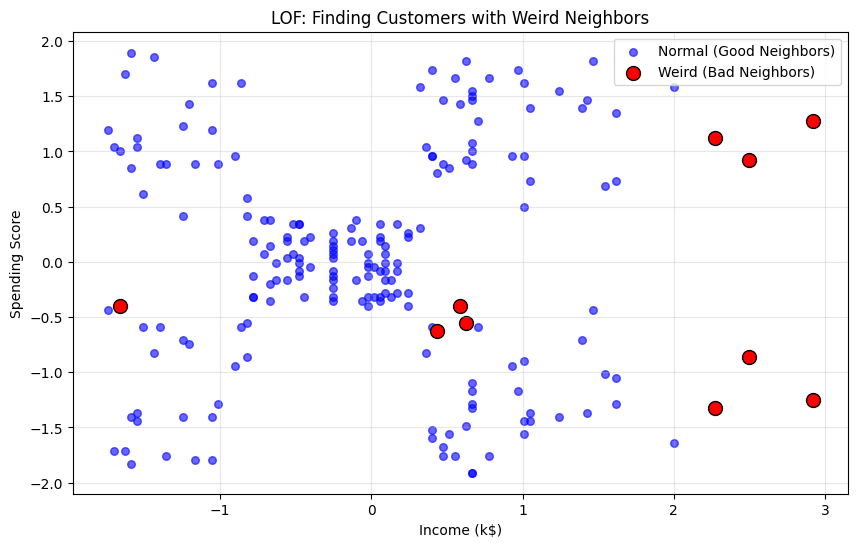

Mall_Customers.csv


In [ ]:
#LOF(local outliers factor )

import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Your data loading
df = pd.read_csv('Mall_Customers.csv')  # or however you load your data

# Select relevant columns
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X_scaled)

# Plot results
plt.figure(figsize=(10, 6))
# Normal points (low LOF scores)
plt.scatter(X_scaled[y_pred == 1, 0], X_scaled[y_pred == 1, 1],
           c='blue', label='Normal (Good Neighbors)', alpha=0.6, s=30)
# Anomalies (high LOF scores)
plt.scatter(X_scaled[y_pred == -1, 0], X_scaled[y_pred == -1, 1],
           c='red', s=100, label='Weird (Bad Neighbors)', edgecolors='black', linewidth=1)

plt.title('LOF: Finding Customers with Weird Neighbors')
plt.xlabel('Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Show LOF scores (lower = more normal, higher = more weird)
lof_scores = lof.negative_outlier_factor_
print('Mall_Customers.csv')